<a href="https://colab.research.google.com/github/EylenM/Metodos/blob/main/Copia_de_Lab_7_numerical_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7.1: Numerical_calculus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate
import scipy.integrate as integrate


## Derivation

### <font color='red'>     **Activity: Hecho en el notebook** </font>

Fourier's Law of thermal conduction describes the diffusion of heat. Situations in which there are gradients of heat, a flux that tends to homogenise the temperature arises as a consequence of collisions of particles within a body. The Fourier's Law is giving by

$$ q = -k\nabla T = -k\left( \frac{dT}{dx}\hat{i} + \frac{dT}{dy}\hat{j} + \frac{dT}{dz}\hat{k}\right)$$

where T is the temperature, $\nabla T$ its gradient and k is the material's conductivity. In the next example it is shown the magnitud of the heat flux.
- - -
Consider the temperature profile as
$$ T(x,y) = x^3 + 3x-1+y^2  $$

Compute the derivatiuve in $x$ and $y$ and compare with the analytical derivative in x and y.

### <font color='red'>     **Activity 1** </font>

Consider the next lists for $x_n$ and $y_n$.

* Build the numerical derivative.
* Interpole the data. Interpole the found numerical derivative, next do the integral and find the original polinomial. What conclude?

In [ ]:
x = [0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]
y = [ 1.        ,  1.06925208,  1.27700831,  1.6232687 ,  2.10803324,
        2.73130194,  3.49307479,  4.3933518 ,  5.43213296,  6.60941828,
        7.92520776,  9.37950139, 10.97229917, 12.70360111, 14.5734072 ,
       16.58171745, 18.72853186, 21.01385042, 23.43767313, 26.        ]

In [ ]:
for n in range (len(x)):
    dif = x[n]-x[n-1]
    print(dif)


-5.0
0.26315789
0.26315789999999994
0.26315789
0.26315789999999994
0.26315789
0.26315790000000017
0.26315789
0.2631578999999997
0.26315789
0.2631579000000004
0.26315789
0.26315789999999994
0.26315789
0.26315789999999994
0.26315789
0.2631578999999995
0.26315789000000045
0.2631579000000004
0.26315788999999956


In [ ]:
def fin_diff(y,x):
    """
    Calculate derivative using finite differences
    For interior points: f'(x) ≈ (f(x+h) - f(x-h)) / (2h)
    For endpoints: use forward/backward difference
    """
    h = x[1]-x[0] # Assuming uniform spacing
    n = len(x)  # Number of points
    dy_dx = np.zeros(n) # Array for the derivatives

    for i in range(n):
        if i==0:
            # Forward derivative for the first point
            dy_dx[i]=(y[i+1]-y[i])/h
        elif i==n-1:
            # Backward derivative for the last point
            dy_dx[i]=(y[i]-y[i-1])/h
        else:
            # Central difference for the other points
            dy_dx[i]=(y[i+1]-y[i-1])/(2*h)
    return dy_dx

In [ ]:
dev = fin_diff(y,x)
g = interpolate.CubicSpline(x,y)
h = interpolate.CubicSpline(x,dev)


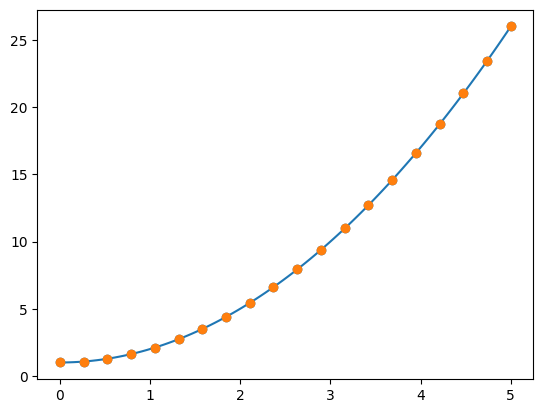

In [ ]:

xs = np.linspace(min(x), max (x),100)
ys = g(xs)
plt.plot(xs,ys)
plt.plot(x,y,'o')
plt.scatter(x,y)
plt.show()

### <font color='red'>     **Activity 2** </font>

The radar stations A and B, separated by the distance a = 500 m, track the plane
C by recording the angles $\alpha$ and $\beta$ at 1-second intervals. The successive readings are

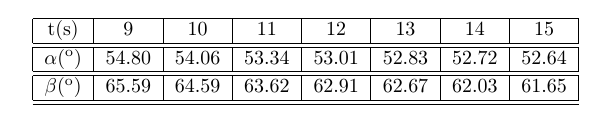

In [ ]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/sbustamante/ComputationalMethods/refs/heads/master/material/figures/table.png")

calculate the speed v using the 3 point approximantion at t = 10 ,12 and 14 s. Calculate the x component of the acceleration of the plane at = 12 s. The coordinates of the plane can be shown to be

\begin{equation}
x = a\frac{\tan \beta}{\tan \beta- \tan \alpha}\\
y = a\frac{\tan \alpha\tan \beta}{\tan \beta- \tan \alpha}
\end{equation}


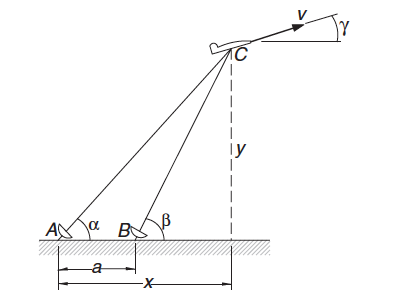

In [ ]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/sbustamante/ComputationalMethods/refs/heads/master/material/figures/radar.png")

## Integration

### <font color='red'>     **Activity 1** </font>

Compute the integral of $f(x)$ in $[a,b]$ using the trapezoidal method. Compare with Scipy modulo **integrate.trapezoid** and **integrate.quad(lambda x: f(x), a, b)**

### <font color='red'>     **Activity 2** </font>

Approximate the following integrals using formulas Trapezoidal and Simpson rules. Are the accuracies of
the approximations consistent with the error formulas?

\begin{eqnarray*}
&\int_{0}^{0.1}&\sqrt{1+ x}dx \\
&\int_{0}^{\pi/2}&(\sin x)^2dx\\
&\int_{1.1}^{1.5}&e^xdx
\end{eqnarray*}

### <font color='red'>     **Activity 3** </font>

- Using the Composite trapezoidal and Simpson's rules, determine the value of the integral

$$ \int_{-0.5}^{1.5}(1+\cos^2x + x)dx $$

### <font color='red'>     **Activity 4** </font>

An experiment has measured $dN(t)/dt$, the number of particles entering a counter, per unit time, as a function of time. Your problem is to integrate this spectrum to obtain the number of particles $N(1)$ that entered the counter
in the first second

$$ N(1) = \int_0^1 \frac{dN}{dt} dt$$

For the problem it is assumed exponential decay so that there actually is an analytic answer.

$$ \frac{dN}{dt} = e^{-t} $$

Compare the relative error for the composite trapezoid and Simpson rules. Try different values of N. Make a logarithmic plot of N vs Error.

### <font color='red'>     **Activity 5: Models of Universe (OPCIONAL)** </font>

From the Friedmann equations can be found the dynamics of the Universe, i.e., the evolution of the expansion with time that depends on the content of matter and energy of the Universe. Before introducing the general expression, there are several quatities that need to be defined.

It is convenient to express the density in terms of a critical density $\rho_c$ given by

\begin{equation}
\rho_c = 3H_0^2/8\pi G
\end{equation}

where $H_o$ is the Hubble constant. The critical density is the density needed in order the Universe to be flat. To obtained it, it is neccesary to make the curvature of the universe $\kappa = 0$. The critical density is one value per
time and the geometry of the universe depends on this value, or equally on $\kappa$. For a universe with $\kappa<0$ it would ocurre a big crunch(closed universe) and for a $\kappa>0$ there would be an open universe.    

Now, it can also be defined a density parameter, $\Omega$, a normalized density

\begin{equation}
\Omega_{i,0} = \rho_{i,0}/\rho_{crit}
\end{equation}

where $\rho_{i,0}$ is the actual density($z=0$) for the component $i$. Then, it can be found the next expression

\begin{equation}
\frac{H^2(t)}{H_{0}^{2}} = (1-\Omega_0)(1+z)^2 + \Omega_{m,0}(1+z^3)+ \Omega_{r,0}(1+z)^4 + \Omega_{\Lambda,0}
\end{equation}

where $\Omega_{m,0}$, $\Omega_{r,0}$ and  $\Omega_{\Lambda,0}$ are the matter, radiation and vacuum density parameters. And $\Omega_0$ is the total density including the vacuum energy.

This expression can also be written in terms of the expansion or scale factor($a$) rather than the redshift($z$) due to the expression $1+z = 1/a$ and it can be simplified in several ways.

For the next universe models, plot time($H_{0}^{-1}$ units) vs the scale factor:

-Einstein-de Sitter Universe: Flat space, null vacuum energy and dominated by matter

\begin{equation}
t = H_0^{-1} \int_0^{a'} a^{1/2}da
\end{equation}

-Radiation dominated universe: All other components are not contributing

$$
t = H_0^{-1} \int_0^{a'} \frac{a}{[\Omega_{r,0}+a^2(1-\Omega_{r,0})]^{1/2}}da
$$

-WMAP9 Universe

\begin{equation}
t = H_0^{-1} \int_0^{a'} \left[(1-\Omega_{0})+ \Omega_{m,0}a^{-1} + \Omega_{r,0}a^{-2} +\Omega_{\Lambda,0}a^2\right]^{-1/2} da
\end{equation}


You can take the cosmological parameters  from the link

http://lambda.gsfc.nasa.gov/product/map/dr5/params/lcdm_wmap9.cfm or use these ones: $\Omega_M$ = 0.266,
$\Omega_R = 8.24e-5$ and $\Omega_L = 0.734$.

Use composite simpson rule to integrate and compare it with the analitical expression in case you can get it.
The superior limit in the integral corresponds to the actual redshift $z=0$. What is happening to our universe?

